# scantronMath
- District: 45
- Year (Features): 2017
- Grades: 7, 6, 5, 8, 4
- Values / dataSource: scantronMath
- Features: \[`past_proficient_score`]
- Num features: 1
- Label: `proficient_score`
- Accuracy: 0.87
- F1: 0.84
- Other metrics: RMSE: 0.06, R^2: 0.46
- Notes: Only significantly correlated feature is past_proficient_score, no other features had linear relationships with the label. Dropped grade 3 because it was nearly all full of NaN values.

In [1]:
#Import Python Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
pd.options.display.float_format = '{:.2f}'.format
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
import scipy.stats as stats

In [26]:
#Loading the dataframe
filename = os.path.join(os.getcwd(), "..", "dataframes", "scantronMath_38.csv")
scantronMath_df = pd.read_csv(filename, header = 0)
scantronMath_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,...,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronMath,False,0.94,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.96
1,44783,7,value_scantronMath,False,0.97,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.95
2,44784,6,value_scantronMath,True,1.02,False,False,False,True,False,...,False,False,True,False,False,False,0,0,0,0.99
3,44807,7,value_scantronMath,True,1.02,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,1.04
4,44809,7,value_scantronMath,False,0.92,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.93


In [27]:
#Transform True/False into binary int values
scantronMath_df[scantronMath_df.select_dtypes(include='bool').columns] = scantronMath_df.select_dtypes(include='bool').astype(int)

In [28]:
#Drop dataSource column so we only look at numerical columns
scantronMath_df.drop(columns='dataSource', inplace=True)

In [29]:
#Drop rows with NULL values
nan_count = scantronMath_df.isna().sum()
#print(nan_count)
scantronMath_df = scantronMath_df.dropna()
#scantronMath_df.isna().sum()

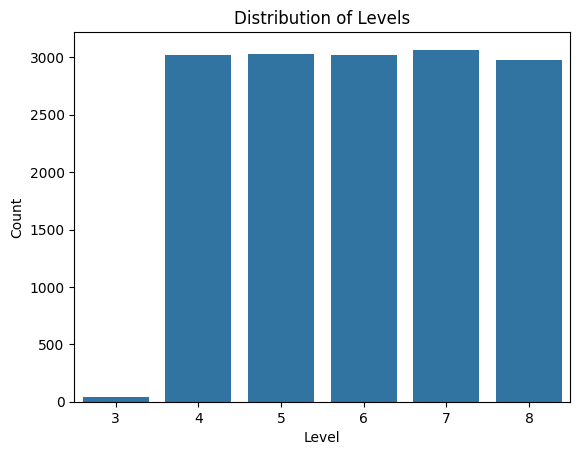

In [30]:
#Plot distribution of grade levels and score amounts
sns.countplot(x='level', data=scantronMath_df)

plt.title('Distribution of Levels')
plt.xlabel('Level')
plt.ylabel('Count')

plt.show()

In [31]:
#Drop grade level 3 entries due to missing values
scantronMath_df = scantronMath_df.drop(scantronMath_df[scantronMath_df['level'] == 3].index)

In [32]:
# Calculate the correlation matrix for the entire DataFrame
correlation_matrix = scantronMath_df.corr()

# Extract the correlation values for 'proficient_score' and sort them in descending order
correlation_with_target = correlation_matrix['proficient_score'].sort_values(ascending=False)

#Drop irrelevant columns
correlation_with_target.drop(['proficient_score', 'level', 'studentId', 'is_proficient'], inplace=True)

#Display top 10
correlation_with_target[:10]

past_proficient_score   0.67
course_Math 7 H/A       0.11
course_Eng 7 H/Adv      0.09
course_CivicH/Adv 7     0.09
course_GeogH/AdvGr7     0.09
course_SoSt6H/A         0.08
course_ELAGrPK6H/Ad     0.08
course_SciGr6H/A        0.08
course_Math6H/Adv       0.08
course_LifeSciH Gr7     0.07
Name: proficient_score, dtype: float64

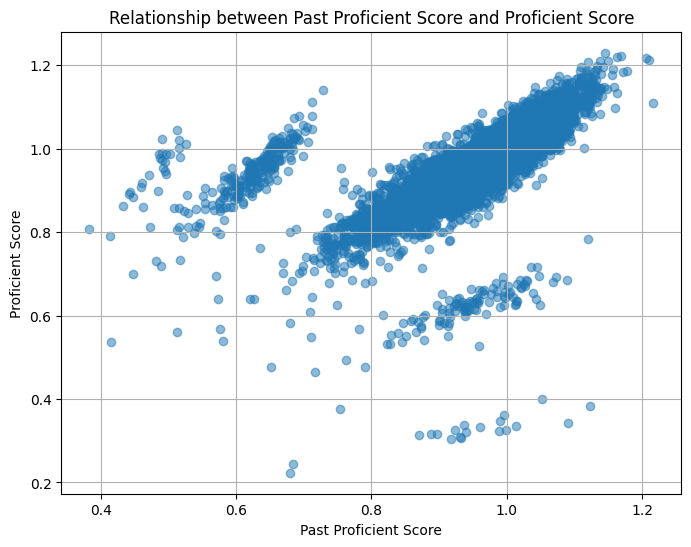

In [33]:
# Scatterplot of past_proficient_score vs proficient_score
plt.figure(figsize=(8, 6))
plt.scatter(scantronMath_df['past_proficient_score'], scantronMath_df['proficient_score'], alpha=0.5)
plt.title('Relationship between Past Proficient Score and Proficient Score')
plt.xlabel('Past Proficient Score')
plt.ylabel('Proficient Score')
plt.grid(True)
plt.show()

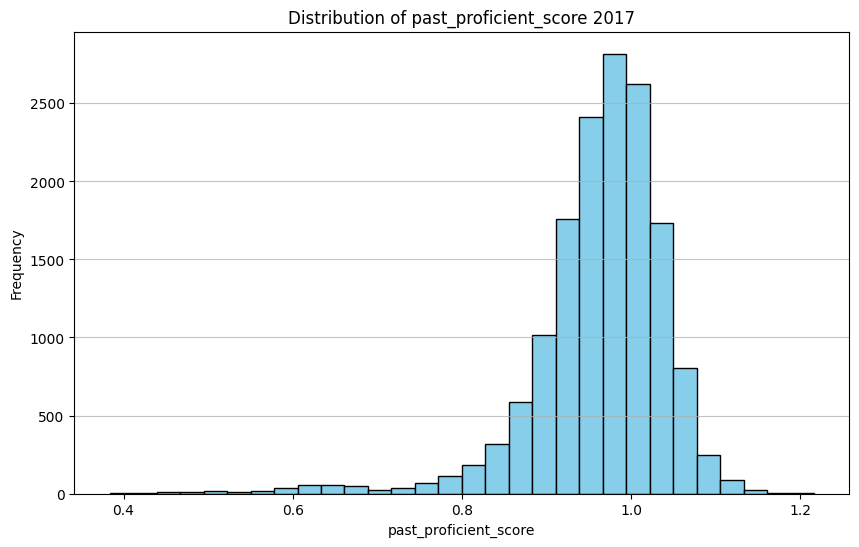

In [10]:

# Plotting a histogram to show distribution of mean proficiency score for math
plt.figure(figsize=(10, 6))
plt.hist(scantronMath_df['past_proficient_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of past_proficient_score 2017')
plt.xlabel('past_proficient_score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [34]:
#Handle Outliers
past_proficient_score_90 = np.percentile(scantronMath_df['past_proficient_score'], 90)


In [35]:
scantronMath_df['past_proficient_score_win'] = stats.mstats.winsorize(scantronMath_df['past_proficient_score'], limits=[0.01, 0.01])
scantronMath_df.head()

/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_88171/2143909596.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scantronMath_df['past_proficient_score_win'] = stats.mstats.winsorize(scantronMath_df['past_proficient_score'], limits=[0.01, 0.01])


,studentId,level,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,...,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score,past_proficient_score_win
0,44777,7,0,0.94,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0.96,0.96
1,44783,7,0,0.97,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0.95,0.95
2,44784,6,1,1.02,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0.99,0.99
3,44807,7,1,1.02,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1.04,1.04
4,44809,7,0,0.92,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0.93,0.93


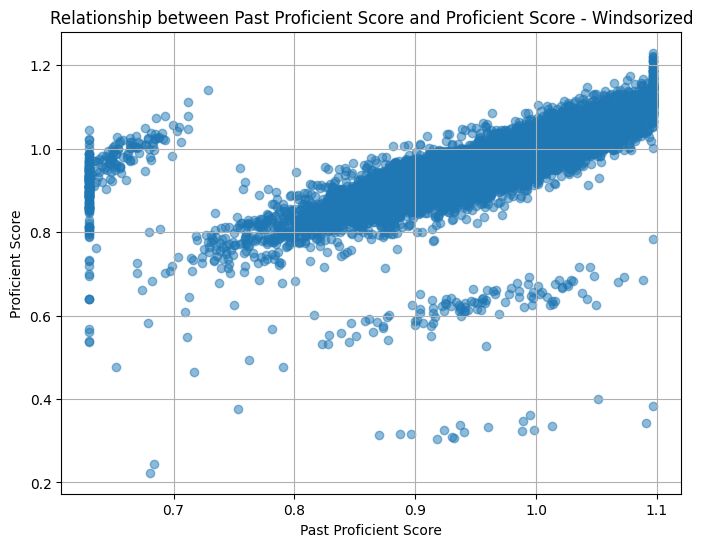

In [13]:
# Scatterplot of past_proficient_score vs proficient_score
plt.figure(figsize=(8, 6))
plt.scatter(scantronMath_df['past_proficient_score_win'], scantronMath_df['proficient_score'], alpha=0.5)
plt.title('Relationship between Past Proficient Score and Proficient Score - Windsorized')
plt.xlabel('Past Proficient Score')
plt.ylabel('Proficient Score')
plt.grid(True)
plt.show()

# Training Models
- Independent Variables: proficient_score as label, linear regression model and hyperparameters
- Dependent Variables: Number of features, which features, past_proficient_score_win or past_proficient_score

In [36]:
#Using past_proficient_score as feature
features = ['past_proficient_score']
X = scantronMath_df[features]
y = scantronMath_df['proficient_score']

In [37]:
#Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

past_proficient_score   0.64
dtype: float64
threshold= 1.0

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.96      0.91      1567
        True       0.88      0.67      0.76       700

    accuracy                           0.87      2267
   macro avg       0.87      0.81      0.83      2267
weighted avg       0.87      0.87      0.86      2267


Confusion Matrix:
[[1502   65]
 [ 232  468]]

Top 10 Most Important Features:
                 feature  importance
0  past_proficient_score        0.64

Model Performance

RMSE =   0.06
 R^2 =   0.44


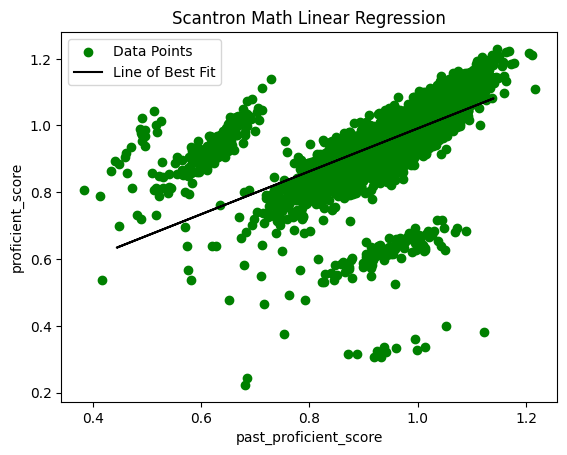

In [38]:
#Make new LinearRegression() model and fit to training data
model = LinearRegression()
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)



feature_importance = pd.Series(model.coef_, index=X_test.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)
print(feature_importance)

# Should predict >1.0 if proficient, <1.0 if not proficient
threshold = 1.0  # ADJUST
y_pred_bool = prediction >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bool, y_pred_bool))

# Print the top 10 most important features
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))

#Plotting the data points and the line of best fit
plt.scatter(X_train, y_train, color='green', label='Data Points')  # Plot the data points
plt.plot(X_test, prediction, color='black', label='Line of Best Fit')  # Plot the line of best fit

# Adding labels and title
plt.xlabel('past_proficient_score')
plt.ylabel('proficient_score')
plt.title('Scantron Math Linear Regression')

# Show legend
plt.legend()

In [17]:
#Using past_proficient_score_win as feature
features = ['past_proficient_score_win']
X = scantronMath_df[features]
y = scantronMath_df['proficient_score']

In [18]:
#Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

past_proficient_score_win   0.69
dtype: float64
threshold= 1.0

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.95      0.91      1567
        True       0.86      0.70      0.77       700

    accuracy                           0.87      2267
   macro avg       0.87      0.83      0.84      2267
weighted avg       0.87      0.87      0.87      2267


Confusion Matrix:
[[1490   77]
 [ 210  490]]

Top 10 Most Important Features:
                     feature  importance
0  past_proficient_score_win        0.69

Model Performance

RMSE =   0.06
 R^2 =   0.46


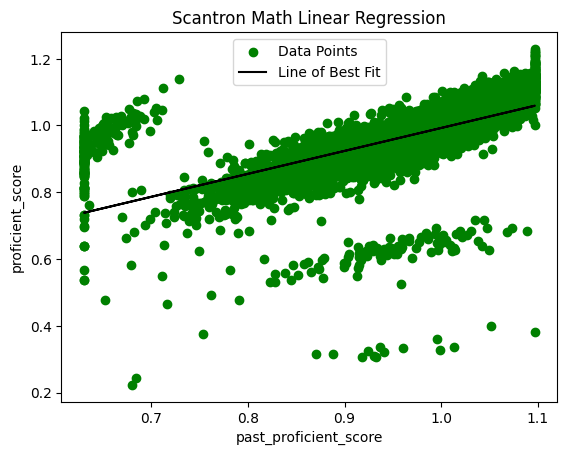

In [25]:
#Create LinearRegression() model
model = LinearRegression()
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)



feature_importance = pd.Series(model.coef_, index=X_test.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)
print(feature_importance)

# Should predict >1.0 if proficient, <1.0 if not proficient
threshold = 1.0  # ADJUST
y_pred_bool = prediction >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bool, y_pred_bool))

# Print the top 10 most important features
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))



#Plotting the data points and the line of best fit
plt.scatter(X_train, y_train, color='green', label='Data Points')  # Plot the data points
plt.plot(X_test, prediction, color='black', label='Line of Best Fit')  # Plot the line of best fit

# Adding labels and title
plt.xlabel('past_proficient_score')
plt.ylabel('proficient_score')
plt.title('Scantron Math Linear Regression')

# Show legend
plt.legend()